# Popular topics

Find out popular topics in tweets, typically per day or hour

## 1. Retweet bot detection

In [1]:
import os
import pandas as pd
import re

from IPython.display import clear_output

In [2]:
def squeal(text=None):
    clear_output(wait=True)
    if not text is None: 
        print(text)

In [53]:
def get_tweets(target_file_name_filter):
    files_df = pd.DataFrame(os.listdir(DATADIR), columns=["file_name"])
    target_file_names = list(files_df[files_df.file_name.str.startswith(target_file_name_filter)]["file_name"])

    results_df = pd.DataFrame()
    for file_name in sorted(target_file_names):
        if len(results_df) == 0:
            results_df = pd.read_csv(DATADIR + file_name)
            first_file = False
        else:
            results_df = pd.concat([results_df, pd.read_csv(DATADIR + file_name)])
        squeal(f"[1/3] processing date file {file_name}")
    return results_df

In [54]:
def get_user_pairs(tweets_df):
    user_pairs = {}
    counter = 0
    for tweet_text_users in tweets_df.loc[:,["user","text"]].groupby(["text"]):
        if len(tweet_text_users[1]["user"]) > 1:
            for user1 in tweet_text_users[1]["user"]:
                for user2 in tweet_text_users[1]["user"]:
                    if user1 != user2:
                        if user1 not in user_pairs:
                            user_pairs[user1] = {}
                        if user2 not in user_pairs[user1]:
                            user_pairs[user1][user2] = 0
                        user_pairs[user1][user2] += 1
        counter += 1
        if counter % 1000 == 0:
            squeal(f"[2/3] collecting user pairs of {len(tweets_df)} tweets: {counter}")
    return user_pairs

In [55]:
def get_user_groups(user_pairs, threshold = 10):
    user_groups = { user: [user] for user in user_pairs }
    counter = 0
    for user1 in user_pairs:
        for user2 in user_pairs[user1]:
            if user_pairs[user1][user2] >= threshold and user2 not in user_groups[user1]:
                combined_group = user_groups[user1] + user_groups[user2]
                for user3 in combined_group:
                    user_groups[user3] = combined_group
        counter += 1
        if (len(user_pairs) - counter) % 1000 == 0:
            squeal(f"[3/3] processing {len(user_pairs)} user pairs: {counter}")
    return user_groups

In [50]:
def get_largest_user_group(user_groups):
    largest_user_group = []
    for user in user_groups:
        if len(user_groups[user]) > len(largest_user_group):
            largest_user_group = user_groups[user]
    return largest_user_group

In [51]:
def get_largest_retweet_user_group(date_filter):
    tweets_df = get_tweets("20211026")
    user_pairs = get_user_pairs(tweets_df)
    user_groups = get_user_groups(user_pairs, threshold=5)
    largest_user_group = get_largest_user_group(user_groups)
    return largest_user_group

In [56]:
largest_retweet_user_group = get_largest_retweet_user_group("20211026")

processing 62043 user pairs: 62043


## 2. Frequent tweets

In [3]:
DATADIR = "../data/text/"

In [57]:
def show_frequent_tweets(target_file_name_filter, nbr_of_tweets=20, largest_retweet_user_group=[]):
    files_df = pd.DataFrame(os.listdir(DATADIR), columns=["file_name"])
    target_file_names = list(files_df[files_df.file_name.str.startswith(target_file_name_filter)]["file_name"])

    results_df = pd.DataFrame()
    for file_name in target_file_names:
        if len(results_df) == 0:
            file_data = pd.read_csv(DATADIR + file_name)
            results_df = file_data[~file_data.user.isin(largest_retweet_user_group)]
        else:
            file_data = pd.read_csv(DATADIR + file_name)
            results_df = pd.concat([results_df, file_data[~file_data.user.isin(largest_retweet_user_group)]])
    counts = results_df["text"].value_counts()
    for i in counts.index[0: nbr_of_tweets]:
        print(counts[i], i, end="\n\n")

In [58]:
largest_retweet_user_group = get_largest_retweet_user_group("20211026")
show_frequent_tweets("20211026", largest_retweet_user_group=largest_retweet_user_group)

2294 RT @UTDTrey: "Van Dijk and his Portuguese bitch🥰" https://t.co/iTqbjBYsPU

866 RT @annstrikje: Helen Mertens, bestuursvoorzitter MUMC: 8 op de 10 patiënten zijn  gevaccineerde patiënten. \n\nhttps://t.co/6HxqMjFSvp

632 RT @tabibutts: backstage @ alexander mcqueen “the hunger” ss96 rtw\nvia @/judasvandewal https://t.co/tHjgHjlDfO

552 RT @BarcaWorldwide: "He gave my locker to Luuk De Jong..." https://t.co/gAPK49NUvl

527 RT @Crypto__babyy: @BinanceChain Contract: 0xd1ecfdd45c49057479c4ca95e045855370bc4f5b\n\nhttps://t.co/avu1LyEg6o

486 RT @RMBras1973: Een Land wat ongevaccineerden in een Lockdown zet om ze te dwingen zich te laten vaccineren is een dictatuur!!\nRT=Eens.

409 Wat een land. Gevaccineerde mensen hoeven zich niet te laten testen en komen overal binnen terwijl ze #corona kunnen hebben én overdragen, terwijl ongevaccineerden met een negatieve test en dus zónder Corona dadelijk extra maatregelen op hun dak krijgen.  \n\n#coronamaatregelen

390 RT @TBChaelisa: Rosé met h

In [60]:
largest_retweet_user_group = get_largest_retweet_user_group("20211102")
show_frequent_tweets("20211102", largest_retweet_user_group=largest_retweet_user_group)

processing 62043 user pairs: 62043
564 RT @FCBarcelona: 💥𝐆𝐎𝐀𝐋 𝐁𝐀𝐑𝐂̧𝐀! @ANSUFATI GOES TOP BINS FROM  THE MIDDLE OF THE BOX! 0-1! #DYNAMOBARÇA https://t.co/FYAZjkWBdo

490 Hou op met dwingen, pushen en uitbreiden van die vreselijke coronatoegangsbewijzen. Pure schijnveiligheid. En had maar miljarden extra geïnvesteerd in meer zorgcapaciteit en verpleegkundigen ipv in asielzoekers! \n\n#persconferentie #persco https://t.co/yRoYNmCaeW

478 RT @thierrybaudet: Wat je ook doet: LAAT JE NIET VACCINEREN!

472 #Persco kijken terwijl ik de kamer van mijn overleden patiënt reinig (covid). Na wekenlang ziektebed is herstel nog altijd niet gegarandeerd, veel patiënten redden het helaas niet. Laat je vaccineren om risico op IC opname te verkleinen. Leef gezond en houd je aan de maatregelen. https://t.co/97dCC6ZpNY

436 Dus gezonde en veelal jonge mensen die nauwelijks een kans lopen om in het ziekenhuis te belanden met corona, worden nu verder onder druk gezet om het vaccin te nemen door hen de toega

In [61]:
largest_retweet_user_group = get_largest_retweet_user_group("20211112")
show_frequent_tweets("20211112", largest_retweet_user_group=largest_retweet_user_group)

processing 62043 user pairs: 62043
7799 [IG] 211112 — Lisa and Dj Snake at Zouk Nightclub in Las Vegas via zoukgrouplv\n\n🔗 https://t.co/i5fyYKOPjT\n\n블랙핑크 리사 #LISA #리사 #BLACKPINK #블랙핑크 #LALISA @BLACKPINK\n\n https://t.co/5vEMvsC8sc

1308 NOGMAALS⚠️\nIk verdom het om onderscheid te gaan maken tussen mensen die zich wel of niet hebben laten vaccineren.\nRT wanneer U zich aan mijn kant schaart.

642 RT @geertwilderspvv: LEUGENAAR. \n\n#persco #Corona #2G\n#HugodeJongeMoetWeg https://t.co/foi3Phk4kh

624 Ivm annulering event zijn er 1000 maaltijden beschikbaar morgen (13 nov) op te halen in 020: paella met vis en chocolade soufflé. Wellicht voor mensen die het nodig hebben? Het mag ook gedeeltelijk ophalen. Alleen in grote aantallen. DM mij. Blijf van mijn lijf, opvang, daklozen

623 RT @DeSpeld: Let op: dit weekend gaat de klok weer een jaar achteruit https://t.co/m0oj9sdVpY

521 Of je voor/tegen vaccinatie bent of een nuance er tussen in, zelf gevaccineerd of ongevaccineerd,  er is nog 

In [62]:
largest_retweet_user_group = get_largest_retweet_user_group("20211116")
show_frequent_tweets("20211116", largest_retweet_user_group=largest_retweet_user_group)

processing 62043 user pairs: 62043
645 RT @thierrybaudet: Deze hashtag gaat wel heel hard nu! Op naar de 20k tweets! #BaudetHeeftGelijk #Baudet https://t.co/5MiCxdYPmD

587 100% vaccinatie is de natte droom van Hugo &amp; Mark. Dan is de epidemie voorbij, NOT! Check Gibraltar, de meest gevaccineerde regio ter wereld (100% dubbel gevaccineerd, 40% booster), heeft nu kerst afgelast om "exponentiële" stijging besmettingen! #2GRegel\nhttps://t.co/cs7HooHzym

558 RT @Sandervandam2: Bedoelen jullie deze tweet? Ja dat zou wel vervelend zijn als die verder verspreid werd. https://t.co/QyU1CjeIZe

505 RT @MertensJarne: Er zijn nog goeie mensen op deze wereld https://t.co/p26UCl0MfJ

492 Miljoenen kinderen kunnen door het absurde "coronabeleid" niet op een normale manier Sinterklaas vieren en in Volendam werd de intocht zelfs geannuleerd. Daarom organiseerden we een eigen intocht. Omdat alle kinderen recht hebben op een Sinterklaasfeest. #FVD #Baudetheeftgelijk https://t.co/J4hd9i0OYH

430 Het i

In [63]:
largest_retweet_user_group = get_largest_retweet_user_group("20211126")
show_frequent_tweets("20211126", largest_retweet_user_group=largest_retweet_user_group)

processing 62043 user pairs: 62043
1229 "Congratulations @realsehajpal Bhai for winning boss meter 💪 Kya dam hai bande mein aur uske fans meinz kamaal ekdam!💪👏\n #PratikIsTheBoss #PratikSehajpal #BB15 #BiggBoss15 #WeekendKaVaar https://t.co/V6luxkKmlq

951 1. Laten we even bij de buren kijken, hoe gaat het in Frankrijk? Gisterenavond gaf de Franse minister van volksgezondheid een persconferentie. Pijnlijk maar ook leerzaam om de vergelijking te maken. Een draadje.

667 RT @DeSpeld: Rutte: 'Strategie is om het virus in verwarring te brengen met onnavolgbaar beleid' #persconferentie

632 Als het kabinet net zoveel inspanningen had gepleegd voor extra ziekenhuis capaciteit en zorgpersoneel als ze hebben gedaan voor extra plekken voor asielzoekers en AZC’s hadden we nu de helft van problemen niet gehad. #faalhazen

585 De coronavaccins zijn de SLECHTSTE VACCINS OOIT GEMAAKT. Noem mij één ander vaccin dat je 2/3x p.j. moet inspuiten omdat het anders niet ‘werkt’. En dan nog alle bijwerkinge

## 3. Word clouds

Copied from `reddit.ipynb`

In [84]:
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
import re
from wordcloud import WordCloud

In [90]:
stopwords = ("aan aangezien absoluut achter af afgelopen al algemeen alle alleen allemaal allen alles als alsnog alsof altijd ander andere anders "
"antwoord april art augustus basis beeld beetje begin beginnen begint begrijp behalve beide bekend belangrijk ben benieuwd bent bepaalde "
"beperkt best beste betekent beter betreft bezig bij bijna bijv bijvoorbeeld blijf blijft blijkbaar blijkt blijven boven bovendien brengen buiten buurt "
"buurten compleet daadwerkelijk daar daarbij daardoor daarmee daarna daarnaast daarom daarvan daarvoor dacht dag dagen dan dat de december deel denk "
"denken denkt deze dezelfde die dingen direct dit doe doen doet door doordat drie duidelijk dus duurt echt echte echter edit een eens eerder eerlijk eerst "
"eerste eigen eigenlijk eind eindelijk elk elkaar elke en ene enige enkel enkele enorm er erg ergens erger ervan ervoor etc even extra februari fijn flink fout "
"ga gaan gaat gebeuren gebeurt gebruik gebruiken gebruikt gedaan geef geeft geen gegaan gegeven gehad gehouden gek geldt geleden gelijk gelukkig gemaakt genoeg genomen geval "
"geven gevoel gevolgen geweest gewoon geworden gezegd gezien ging gisteren goed goede gooi gooien graag groep groot grootste  grote groter haar had hadden halen half hard heb hebben "
"hebt heeft heel heen helaas hele helemaal helpt hem hen het hetzelfde hier hij hoe hoeft hoeveel hoeveelheid hoeven hoger hoog hoop hoor hopelijk hopen horen hou houd houden "
"houdt huidige hun idee ieder iedere iedereen iemand iets ik in inderdaad ineens informatie ingevoerd inmiddels ipv is ivm ja januari jaren je jezelf jij jonge "
"jou jouw juist juli jullie juni kan kans kant keer kijk kijken klaar klein kleine klinkt klopt kom komen komende komt kon kreeg krijg krijgen krijgt kun kunnen "
"kunt kwam laag laat laatste land landen lang lange langer langs last lastig laten later leer lees lekker letterlijk leven lezen liever liggen ligt lijken lijkt "
"logisch loopt lopen los m'n maak maakt maand maar maart mag maken makkelijk makkelijker man manier me mee meer meerdere meest meeste mei men mensen met "
"meteen middel mij mijn minder misschien mocht moeilijk moest moet moeten mogelijk mogen moment momenteel morgen na naar naast namelijk "
"natuurlijk nauwelijk nauwelijks nederland nederlander nederlanders nederlandse nee neem neemt nemen nergens net niemand niet niets nieuw nieuwe niks nl no "
"nodig nog nogal nooit normaal normale nou november nu of ofzo oktober om omdat on ondanks onder ondertussen ongeveer ons onze ooit ook op openlijk open over overal "
"overigens pa paar pakken pas per persoonlijk plek plekken praten precies prima probeer proberen punt qua raken redelijk relatief rest roepen rond rt samen september serieus simpelweg "
"sinds slechts snap snel sneller som sommige soms soort sowieso staan staat steed steeds stel stellen sterk strak straks stuk te tegen ten terecht terug "
"terwijl teveel the tijd tijden tijdens to toch toe toen tot totaal trouwens tussen twee u uit uiteindelijk uiteraard uur uw vaak vaker vallen valt van vanaf vandaag vanuit vanwege "
"vast vd veel velen ver verder verhaal verkeerd verplicht verschil verschillende vertrouwen vervolgens verwacht verwachten via vind vinden vindt voelt vol "
"voldoende volgen volgende volgens volledig vond voor vooral voorbij voordat voorkomen vorige vraag vrij vrijdag vrijwel vroeg vs waar waarbij waardoor waarin waarom "
"waarschijnlijk waarvan wachten wanneer want waren was wat we week weer weet weg weinig wel welke wellicht werd werden werken werkt weten wie wij wil willen "
"wilt woord word worden wordt x200b z'n zag zal zat ze zeer zeg zeggen zegt zei zeker zelf zelfs zetten zich zichzelf zie zien ziet zij zijn zin zit zitten zo zo'n "
"zoal zoals zodat zodra zoeken zolang zonder zorgen zorgt zou zouden zoveel zover zowel zullen zwaar één"
)

In [80]:
def tokenize(text):
    return(" ".join(TweetTokenizer().tokenize(text)))

In [66]:
def show_wordcloud(term_frequencies):
    plt.figure(figsize=(30, 30))
    plt.imshow(term_frequencies, interpolation="bilinear")
    plt.axis("off")
    plt.savefig("wordcloud.png")
    plt.show()

In [88]:
NBR_OF_TOKENS = 200

def make_wordcloud(posts, nbr_of_tokens=NBR_OF_TOKENS):
    text = " ".join(list(posts["text"]))
    text = re.sub(r'\\n', ' ', text)
    token_freqs = Counter(tokenize(text.lower()).split())
    top = [(t,token_freqs[t]) for t in sorted(token_freqs.keys(),key=lambda t:token_freqs[t], reverse=True) 
                              if t not in stopwords.split() and re.search("[a-z]", t) and len(t) > 1]
    show_wordcloud(wordcloud.generate_from_frequencies(dict(top[:NBR_OF_TOKENS])))
    return top

In [68]:
def get_position(top, token_filter):
    for i in range(0, len(top)):
        if re.search(token_filter, top[i][0]):
            print(f"{i+1}. {top[i][1]} {top[i][0]}")

In [69]:
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white", width=600, height=300, collocations=False, normalize_plurals=False, 
                      relative_scaling=1, regexp=r"\w[\w']+", stopwords=(stopwords).split())

processing date file 20211026-23.out.gz


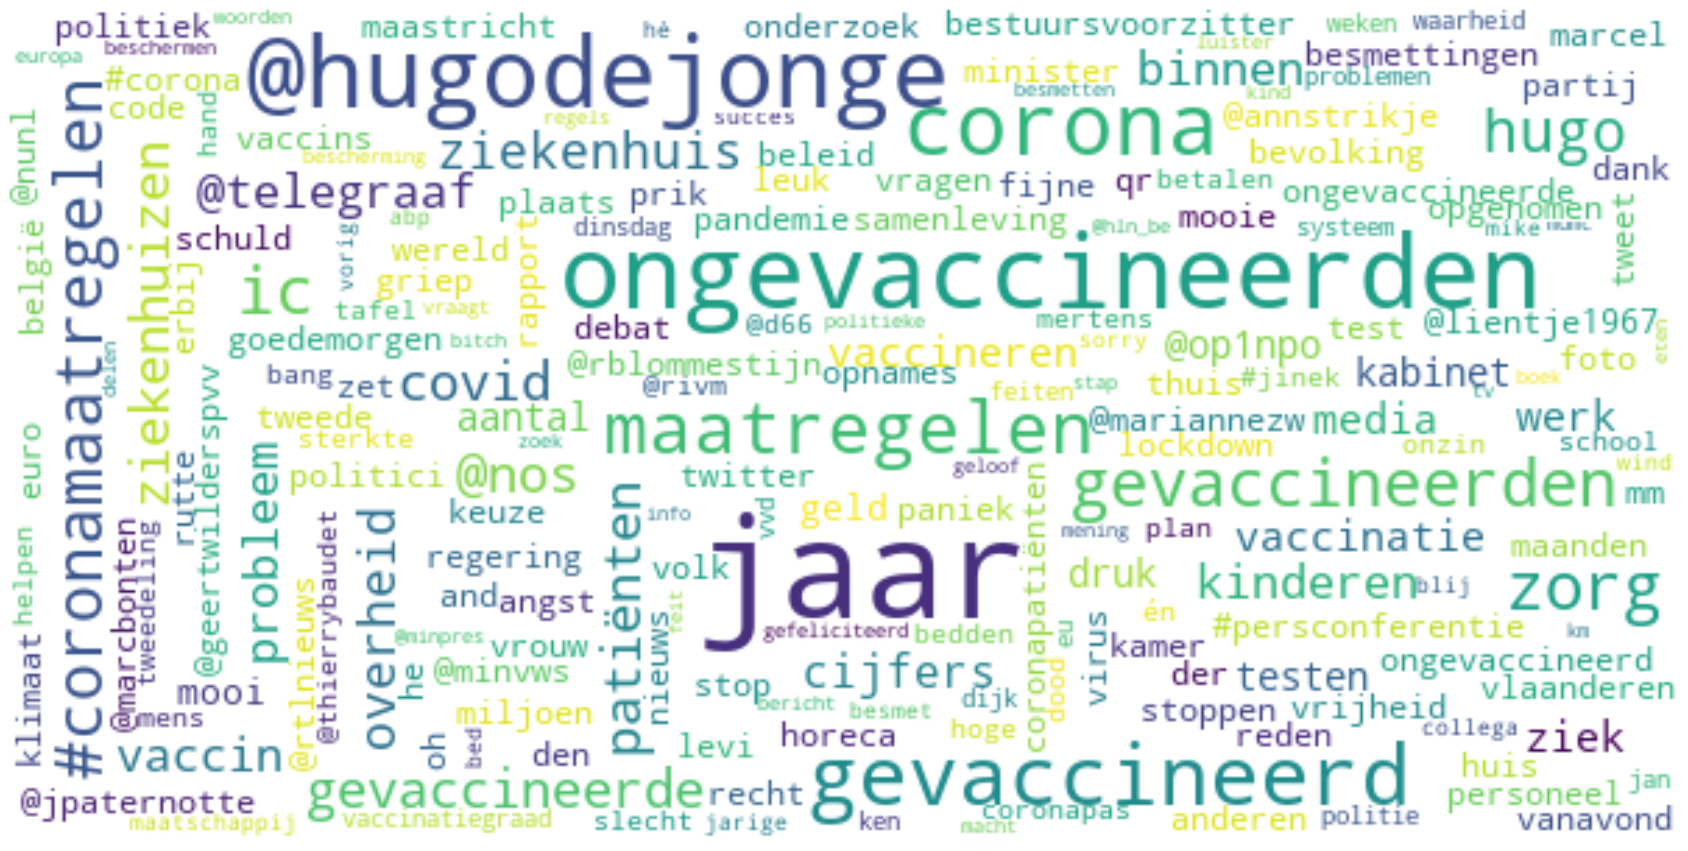

In [97]:
top = make_wordcloud(get_tweets("20211026"))

processing date file 20211102-23.out.gz


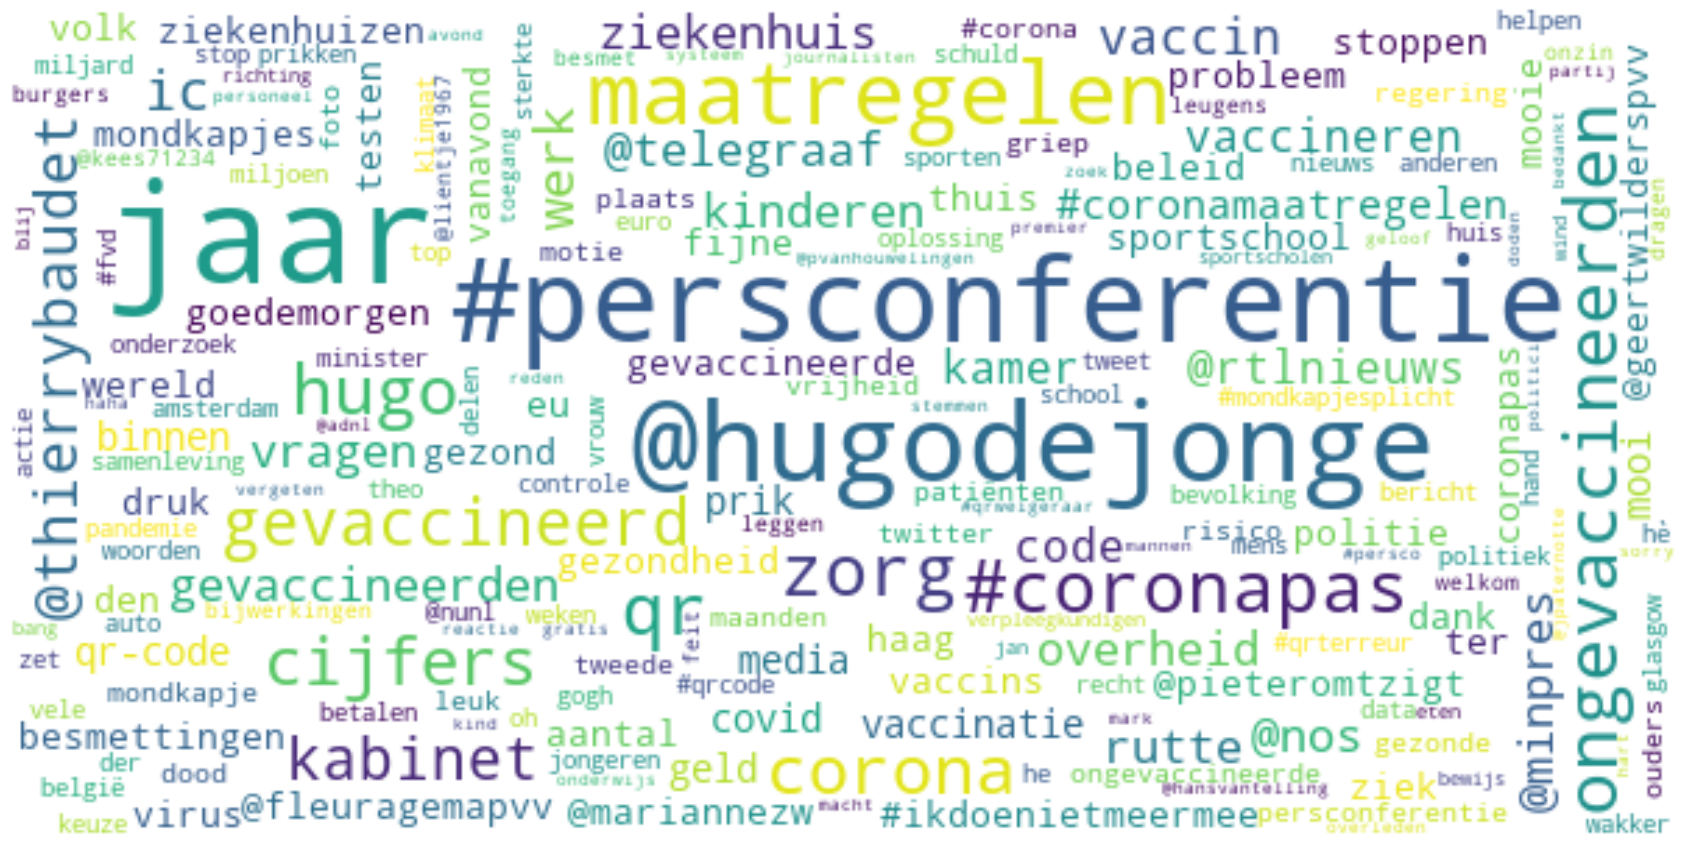

In [93]:
top = make_wordcloud(get_tweets("20211102"))

processing date file 20211112-23.out.gz


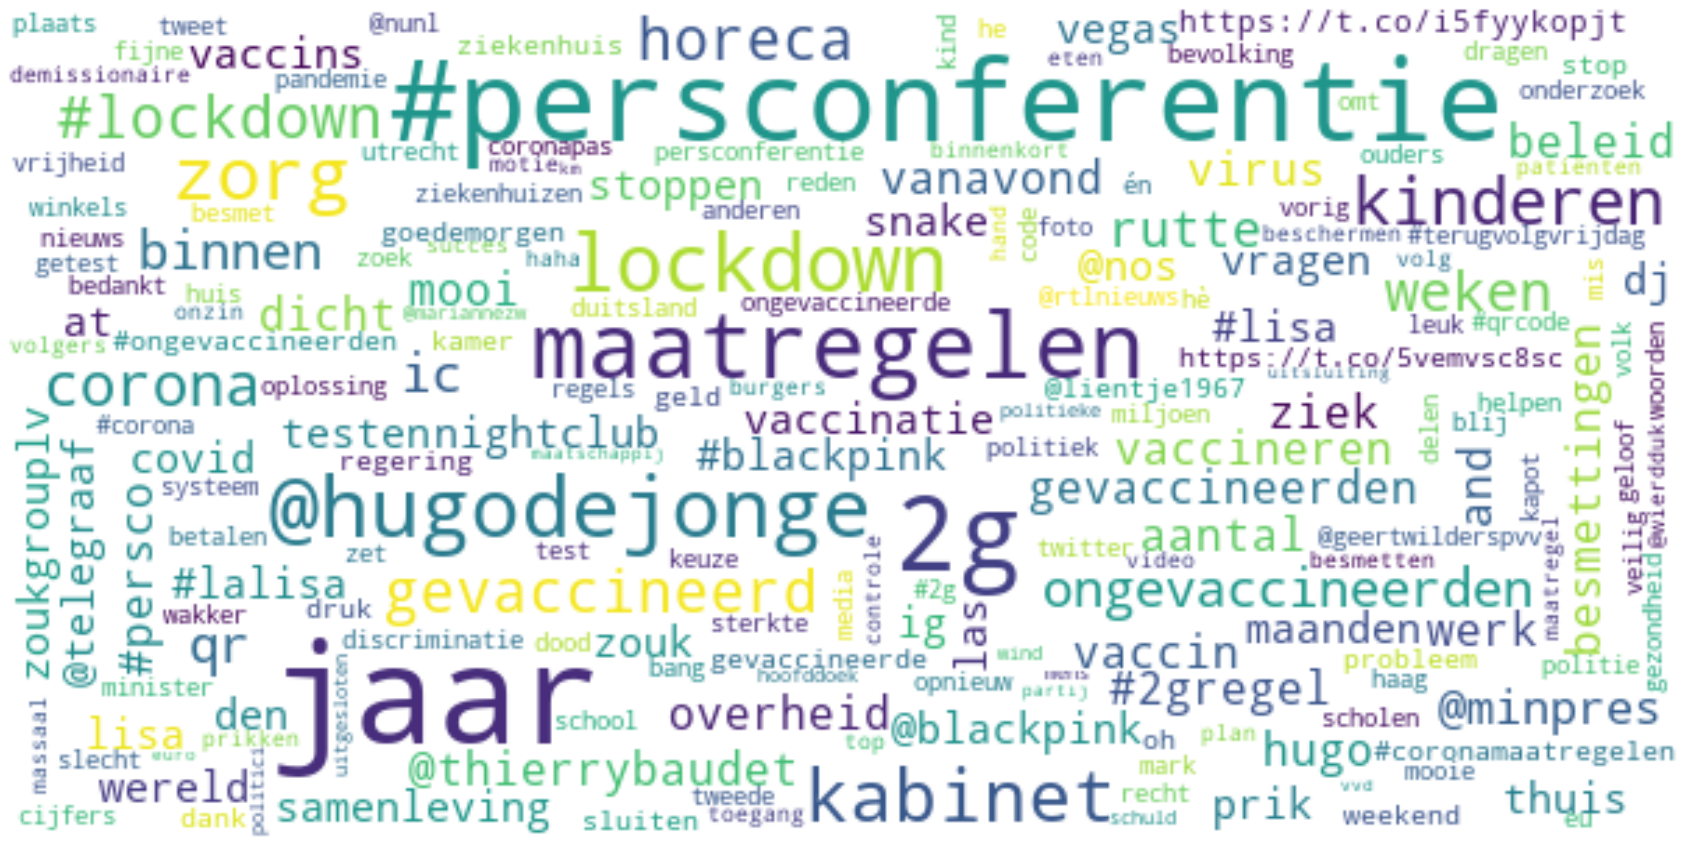

In [94]:
top = make_wordcloud(get_tweets("20211112"))

processing date file 20211116-23.out.gz


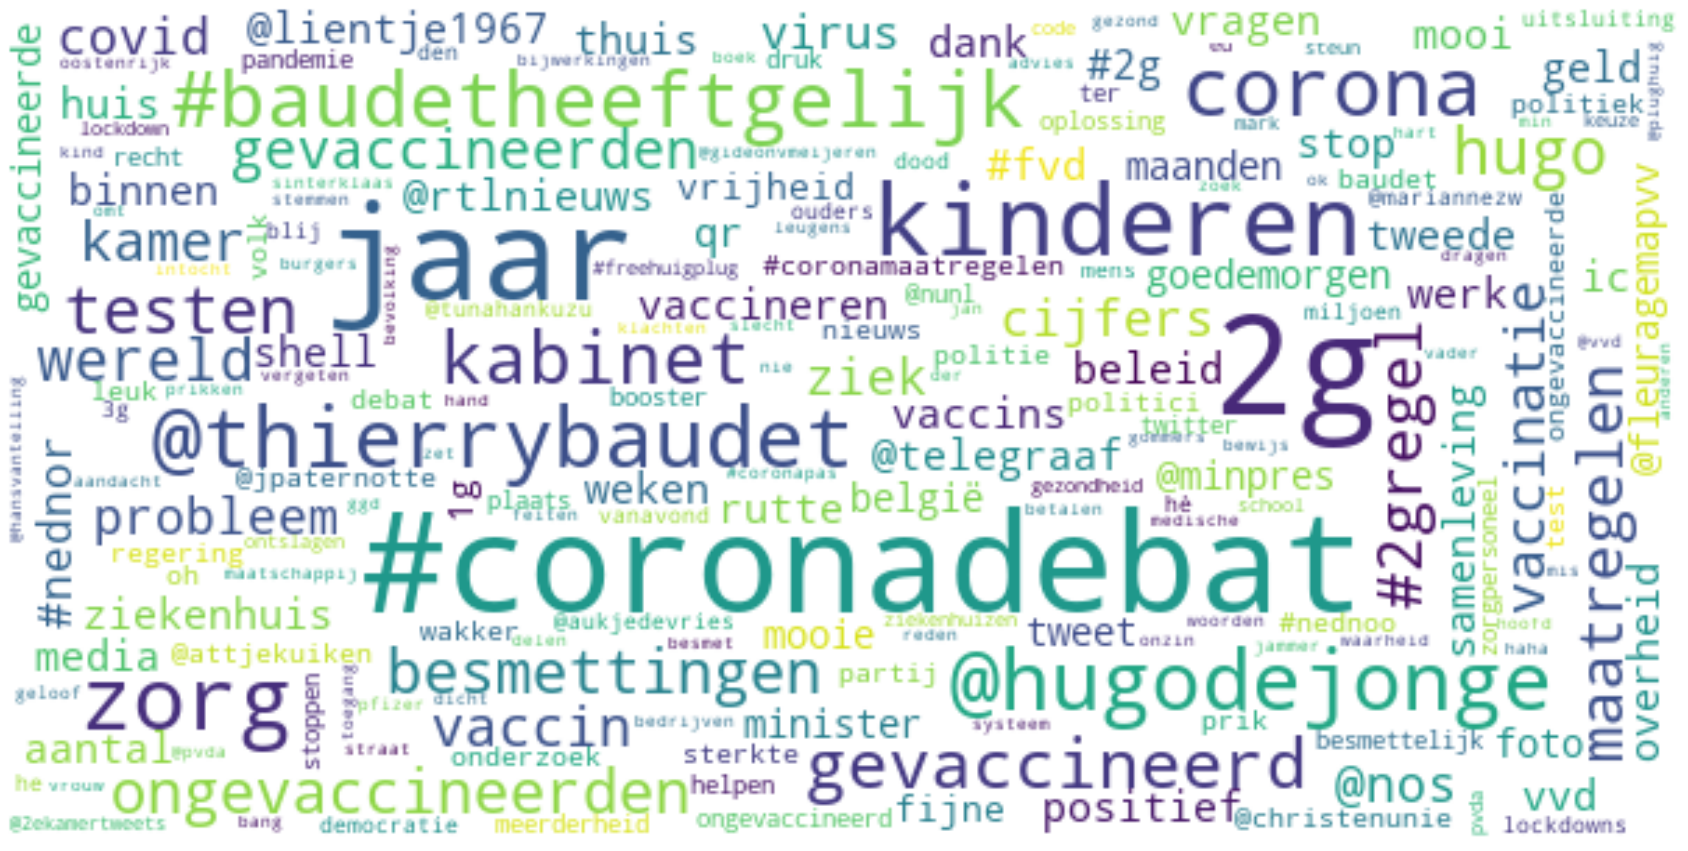

In [95]:
top = make_wordcloud(get_tweets("20211116"))

processing date file 20211126-23.out.gz


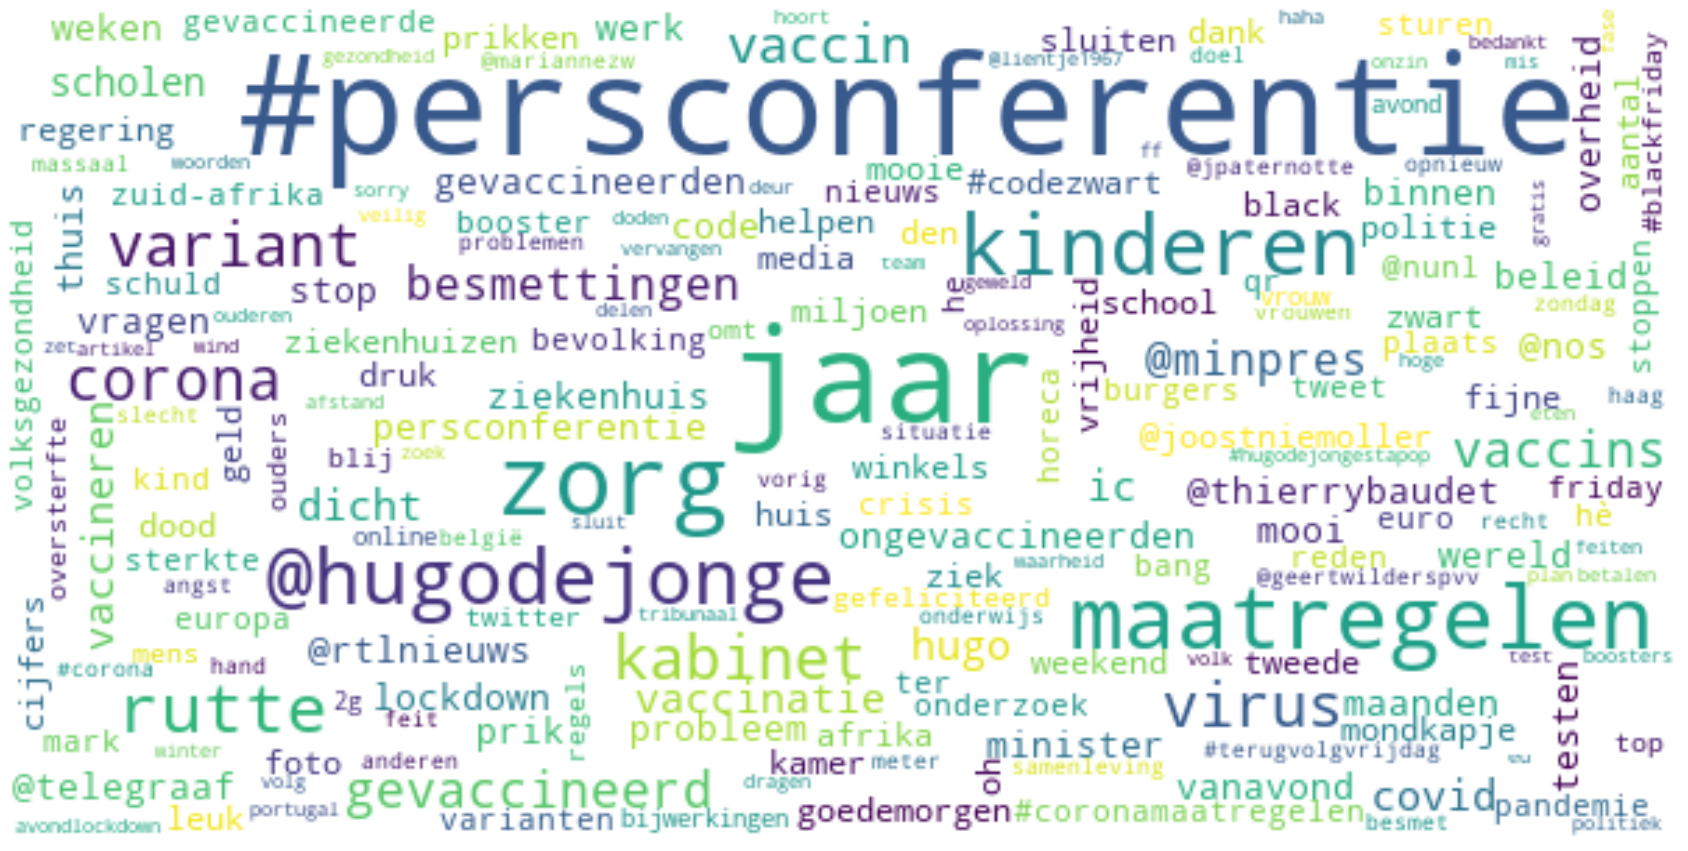

In [96]:
top = make_wordcloud(get_tweets("20211126"))